Explore the raw velocity data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Velocity field data as shape: (3000, 256, 128, 2)


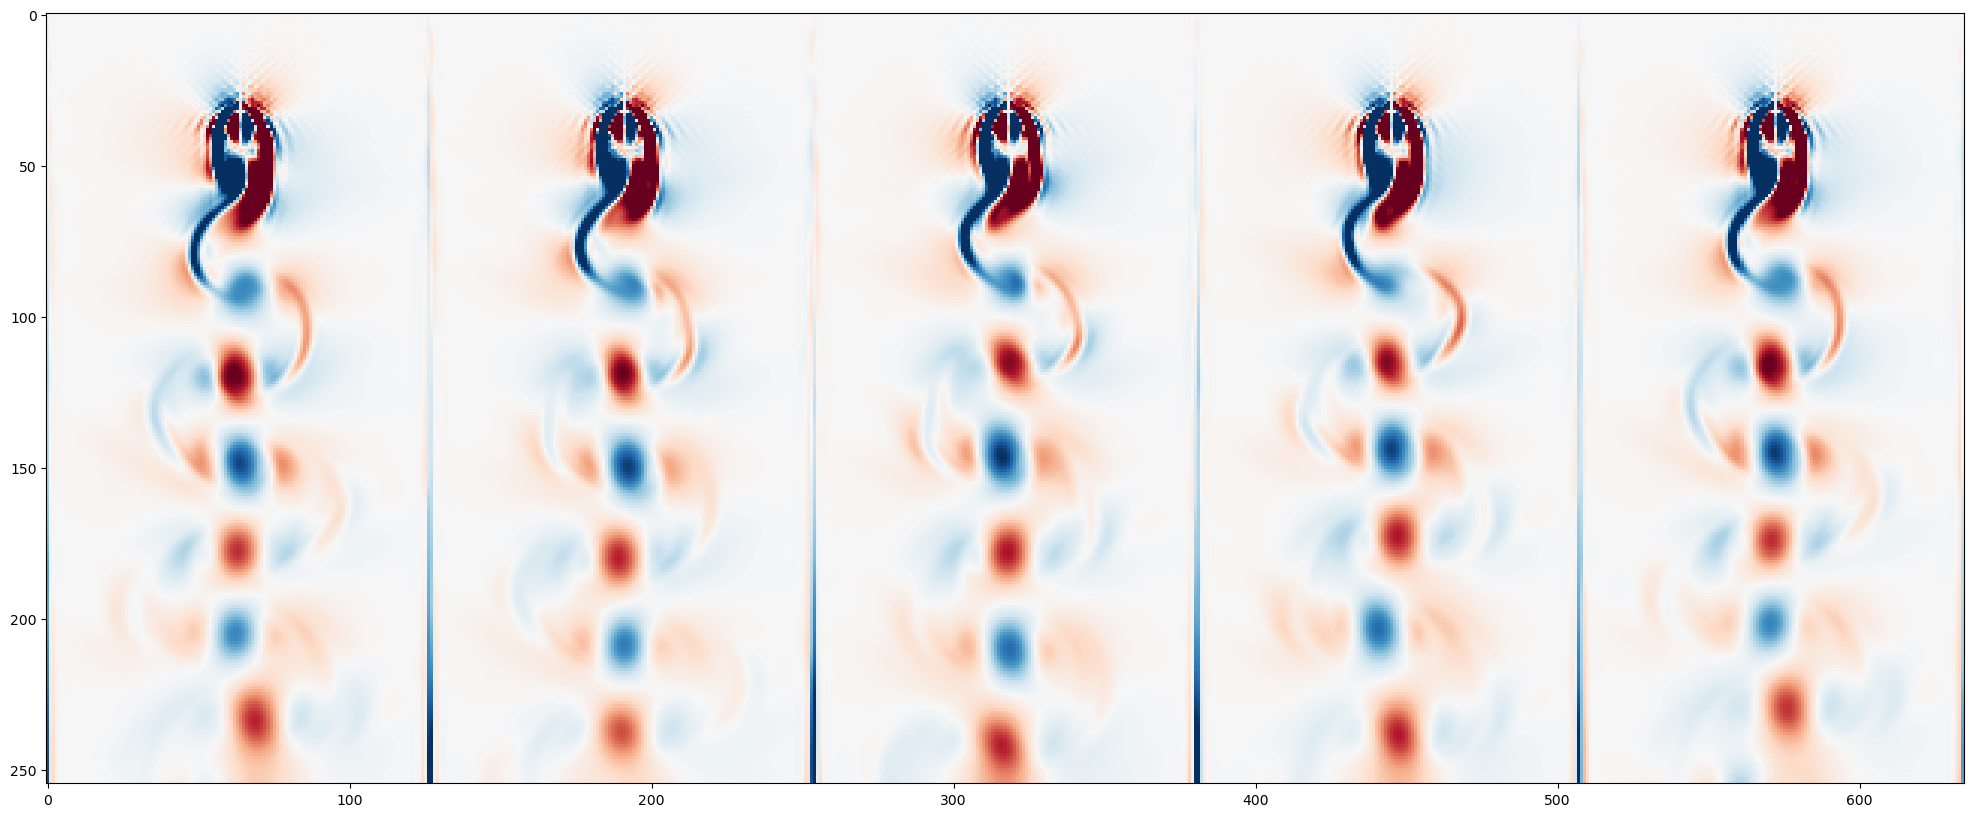

In [2]:
# code copied from William
Re = 300

vfield = np.load(
    f"../hw2/resources/von_karman_street/vortex_street_velocities_Re_{Re}_largefile.npz",
    allow_pickle=True
)
print("Velocity field data as shape: {}".format(vfield.shape))

# Calculate the vortivity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]

vscale = np.max(np.abs(vort_field)) * 0.1
plt.figure(figsize=(50, 10))
plt.imshow(
     np.hstack(vort_field[::600]), 
     vmin=-vscale, vmax=vscale, cmap="RdBu"
)

Velocity field data as shape: (3000, 256, 128, 2)


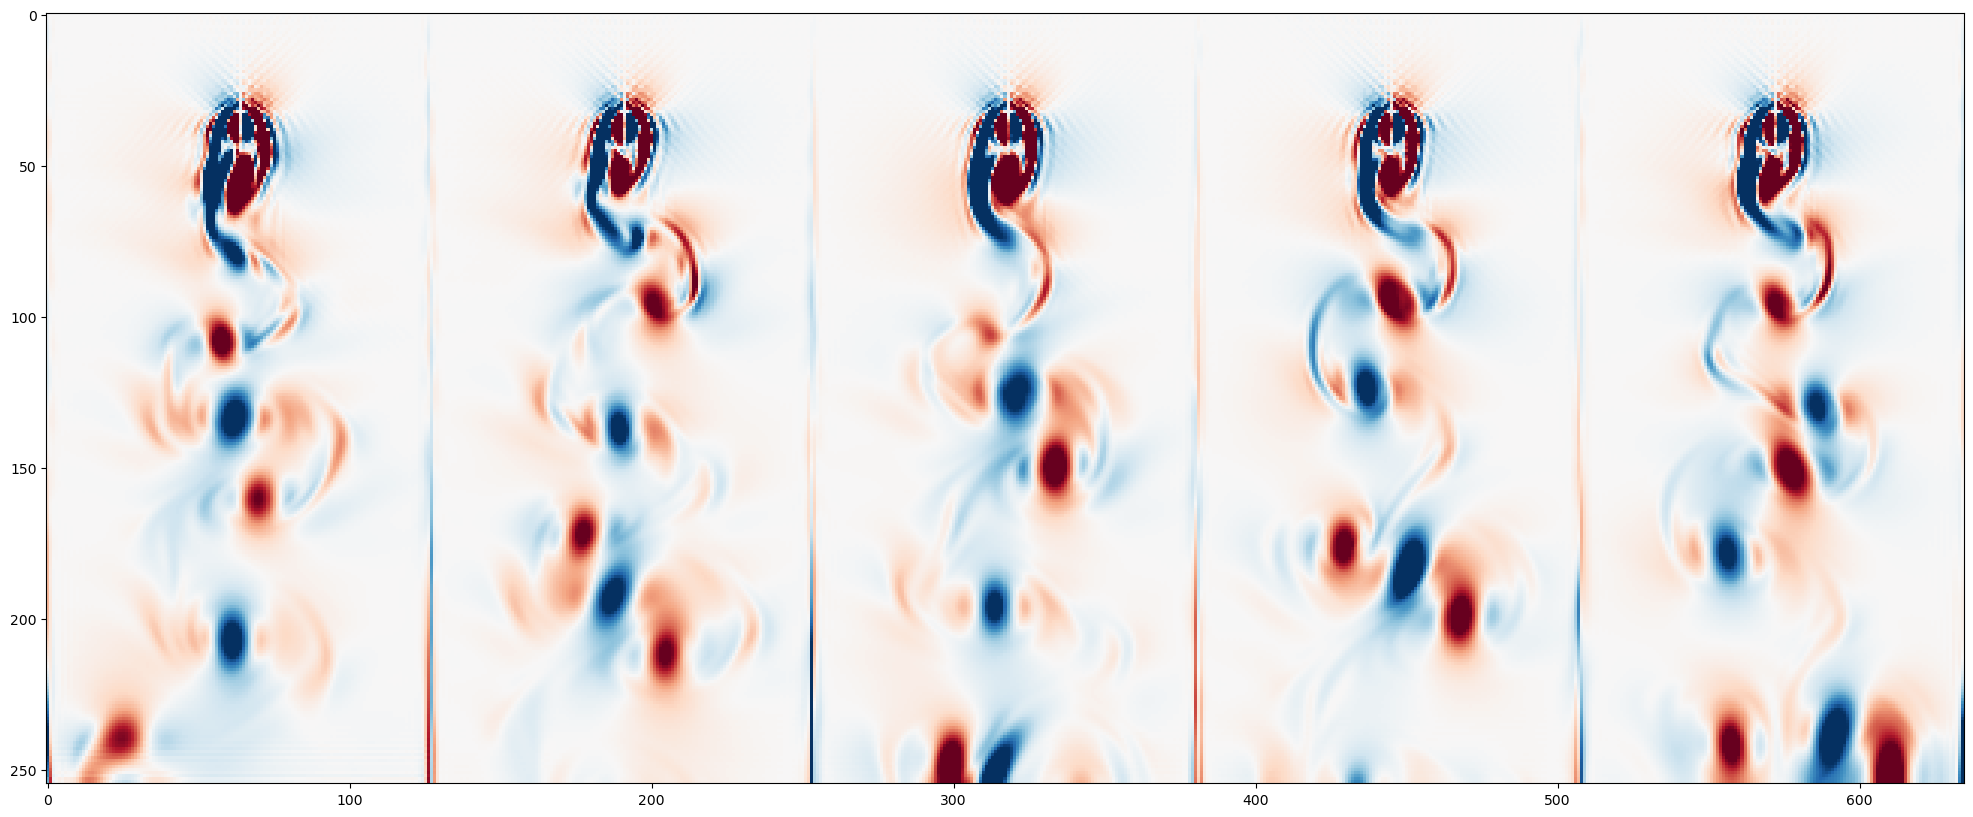

In [3]:
Re = 600

vfield = np.load(
    f"../hw2/resources/von_karman_street/vortex_street_velocities_Re_{Re}_largefile.npz",
    allow_pickle=True
)
print("Velocity field data as shape: {}".format(vfield.shape))

# Calculate the vortivity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]

vscale = np.max(np.abs(vort_field)) * 0.1
plt.figure(figsize=(50, 10))
plt.imshow(
     np.hstack(vort_field[::600]), 
     vmin=-vscale, vmax=vscale, cmap="RdBu"
)

Velocity field data as shape: (3000, 256, 128, 2)


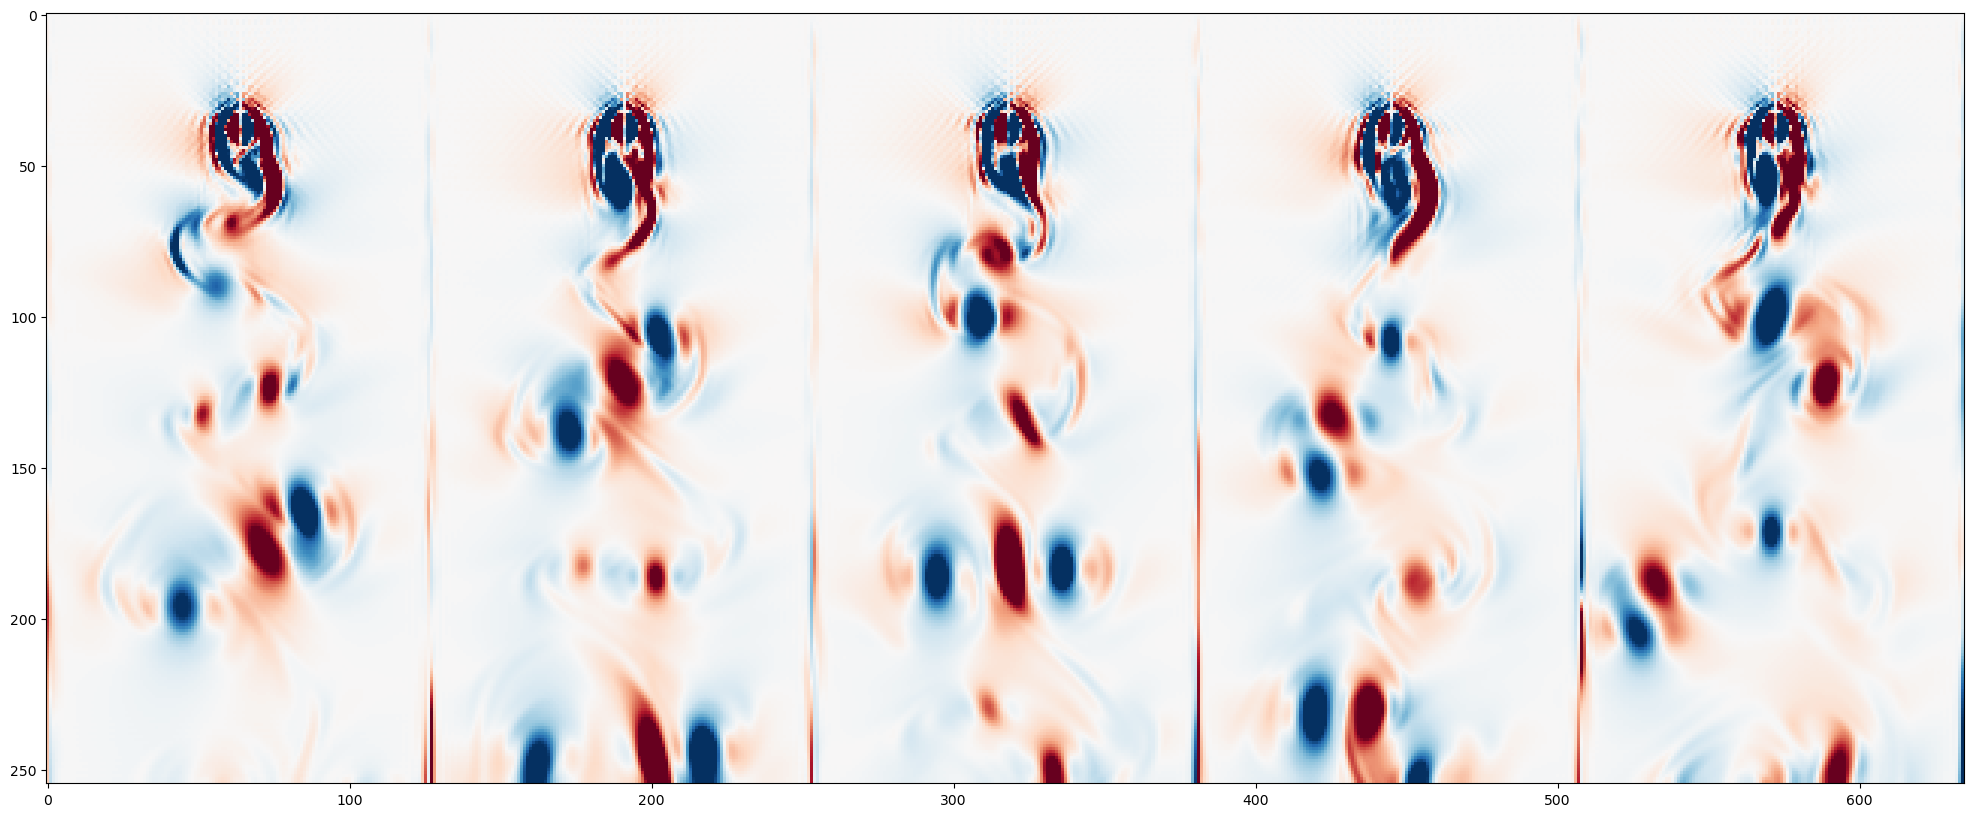

In [4]:
Re = 900

vfield = np.load(
    f"../hw2/resources/von_karman_street/vortex_street_velocities_Re_{Re}_largefile.npz",
    allow_pickle=True
)
print("Velocity field data as shape: {}".format(vfield.shape))

# Calculate the vortivity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]

vscale = np.max(np.abs(vort_field)) * 0.1
plt.figure(figsize=(50, 10))
plt.imshow(
     np.hstack(vort_field[::600]), 
     vmin=-vscale, vmax=vscale, cmap="RdBu"
)

Velocity field data as shape: (3000, 256, 128, 2)


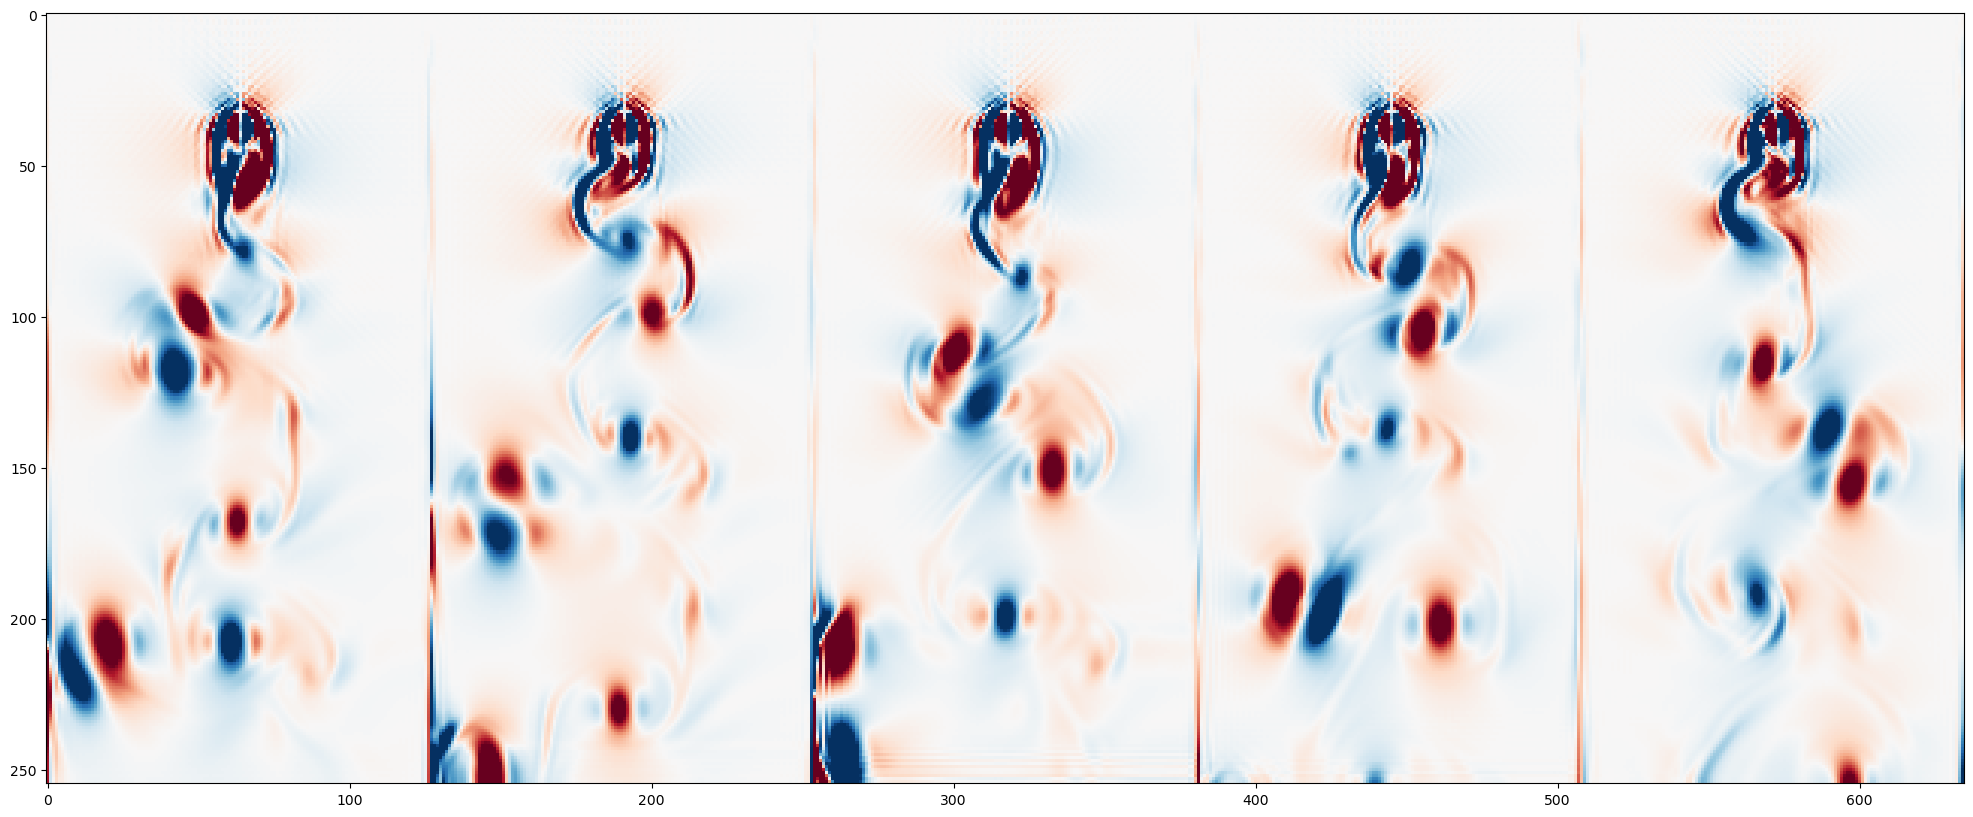

In [20]:
Re = 1200

vfield = np.load(
    f"../hw2/resources/von_karman_street/vortex_street_velocities_Re_{Re}_largefile.npz",
    allow_pickle=True
)
print("Velocity field data as shape: {}".format(vfield.shape))

# Calculate the vortivity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]

vscale = np.max(np.abs(vort_field)) * 0.1
plt.figure(figsize=(50, 10))
plt.imshow(
     np.hstack(vort_field[::600]), 
     vmin=-vscale, vmax=vscale, cmap="RdBu"
)

Implement principle component analysis

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class PrincipalComponents(BaseEstimator, TransformerMixin):
    """
    A class for performing principal component analysis on a dataset.
    """

    def __init__(self, random_state=None):
        self.random_state = random_state
        self.components_ = None
        self.singular_values_ = None

    def fit(self, X):
        """
        Fit the PCA model to the data X. Store the eigenvectors in the attribute
        self.components_ and the eigenvalues in the attribute self.singular_values_

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be fit.
        
        Returns:
            self (PrincipalComponents): The fitted object.
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]

        # subtract off the mean from each measurement type to produce a center matrix
        X = X - np.mean(X, axis=0)
        # calculate the covariance matrix
        sigma = np.matmul(np.transpose(X), X) / n_samples
        # calculate the eigenvectors and eigenvalues
        eigsys = np.linalg.eigh(sigma)
        
        sorted_index = np.argsort(eigsys[0])[::-1]

        self.singular_values_ = eigsys[0][sorted_index]
        self.components_ = eigsys[1].T[sorted_index]
        return self

    def transform(self, X):
        """
        Transform the data X into the new basis using the PCA components
        """
        X = X - np.mean(X, axis=0)

        return np.matmul(X, self.components_.T)

    def inverse_transform(self, X):
        """
        Transform from principal components space back to the original space
        """
        return np.matmul(X, self.components_) + np.mean(X, axis=0)
        

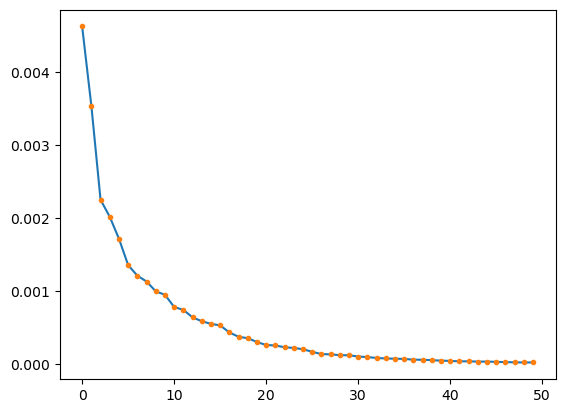

In [25]:
# test the model
# Code copied from William
data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

## Look at skree plot, and identify the "elbow" indicating low dimensionality
plt.figure()
plt.plot(model.singular_values_[:50])
plt.plot(model.singular_values_[:50], '.')

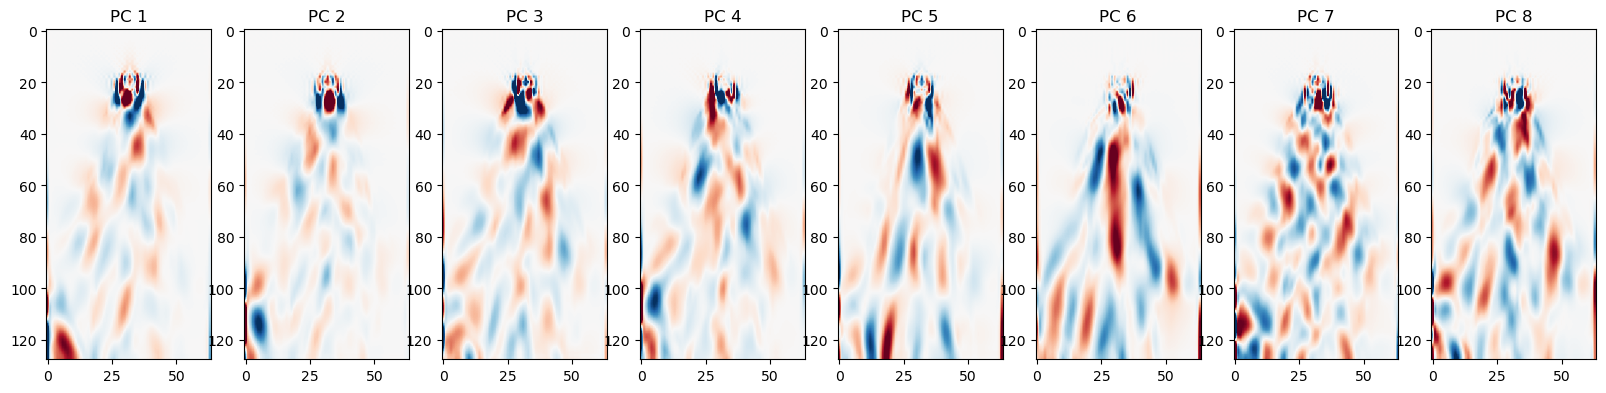

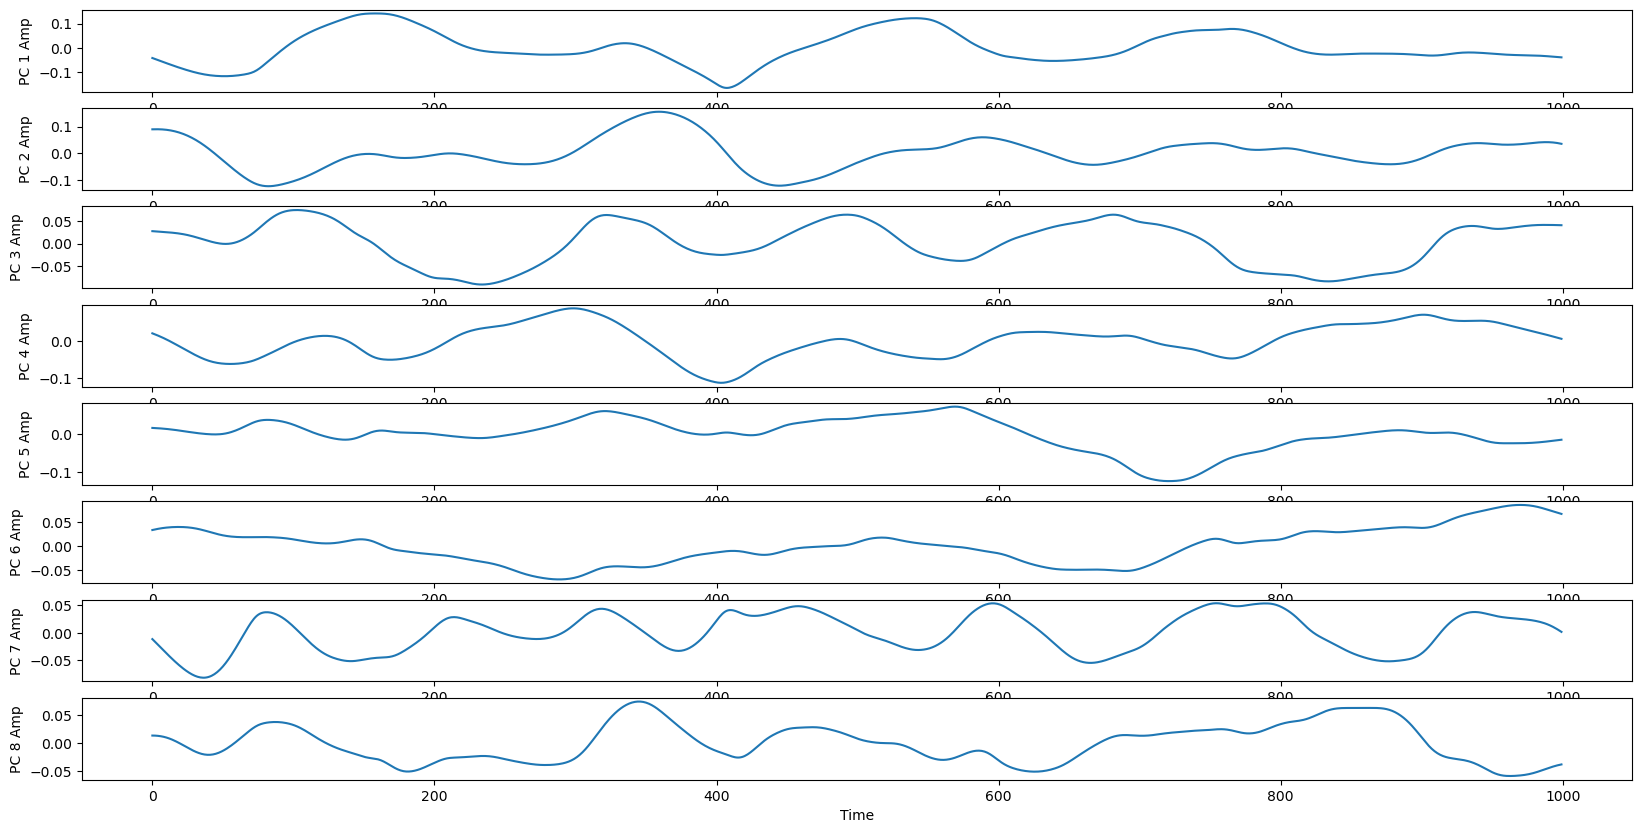

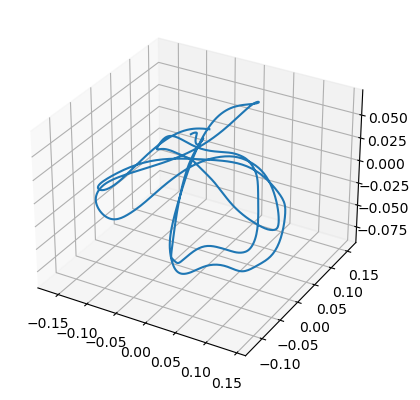

In [26]:
# plot principle components
# code copied from William
plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(1, 8, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(data_transformed[:, i])
    plt.ylabel("PC {} Amp".format(i+1))
plt.xlabel("Time")

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])
